In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# In 2014, FiveThirtyEight built a dataset based on statistics provided 
# by the National Highway Traffic Safety Administration in response to a question 
# asked about which state in the U.S. has the worst drivers

# first things first, we need to find the dataset
accidents = pd.read_csv("bad-drivers.csv", header=0)

# print out the first few rows to view the data
accidents.head(3)

# Since it's a smaller dataset we can take a look at the whole thing as well
accidents

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63
5,Colorado,13.6,37,28,79,95,835.50,139.91
6,Connecticut,10.8,46,36,87,82,1068.73,167.02
7,Delaware,16.2,38,30,87,99,1137.87,151.48
8,District of Columbia,5.9,34,27,100,100,1273.89,136.05
9,Florida,17.9,21,29,92,94,1160.13,144.18


In [4]:
# The data set doesn't seem to have any rows or columns that need to be cleaned
# but we can sort the data into useful categories

state = accidents.iloc[:,0]
total_accident = accidents.iloc[:,1]
speeding_accident = accidents.iloc[:,2]
alcohol_accident = accidents.iloc[:,3]
clean_accident = accidents.iloc[:,4]
no_prior_accident = accidents.iloc[:,5]
premiums = accidents.iloc[:,6]
losses_incurred = accidents.iloc[:,7]


In [5]:
# Find the max, min, average of every numerical column

# Total Accidents

tot_max = total_accident.max()
tot_min = total_accident.min()
tot_avg = total_accident.mean()

print(f'''
Total Accidents:

max: {tot_max}
min: {tot_min}
average: {tot_avg}
''')
      
# Speeding Accidents

speed_max = speeding_accident.max()
speed_min = speeding_accident.min()
speed_avg = speeding_accident.mean()

print(f'''
Speeding Accidents:

max: {speed_max}
min: {speed_min}
average: {speed_avg}
''')
      
# Alcohol Related Accidents

alc_max = alcohol_accident.max()
alc_min = alcohol_accident.min()
alc_avg = alcohol_accident.mean()

print(f'''
Alcohol Related Accidents:

max: {alc_max}
min: {alc_min}
average: {alc_avg}
''')
      
# Non-Distracted Accidents

nd_max = clean_accident.max()
nd_min = clean_accident.min()
nd_avg = clean_accident.mean()

print(f'''
Non-Distracted Accidents:

max: {nd_max}
min: {nd_min}
average: {nd_avg}
''')
      
# No Prior Accident

np_max = no_prior_accident.max()
np_min = no_prior_accident.min()
np_avg = no_prior_accident.mean()

print(f'''
No Prior Accidents:

max: {np_max}
min: {np_min}
average: {np_avg}
''')

# Insurance Premiums

ins_max = premiums.max()
ins_min = premiums.min()
ins_avg = premiums.mean()

print(f'''
Insurance Premiums:

max: {ins_max}
min: {ins_min}
average: {ins_avg}
''')
      
# Losses Incurred

loss_max = losses_incurred.max()
loss_min = losses_incurred.min()
loss_avg = losses_incurred.mean()

print(f'''
Losses Incurred by Insurance:

max: {loss_max}
min: {loss_min}
average: {loss_avg}
''')


Total Accidents:

max: 23.9
min: 5.9
average: 15.79019607843137


Speeding Accidents:

max: 54
min: 13
average: 31.725490196078432


Alcohol Related Accidents:

max: 44
min: 16
average: 30.686274509803923


Non-Distracted Accidents:

max: 100
min: 10
average: 85.92156862745098


No Prior Accidents:

max: 100
min: 76
average: 88.72549019607843


Insurance Premiums:

max: 1301.52
min: 641.96
average: 886.9576470588235


Losses Incurred by Insurance:

max: 194.78
min: 82.75
average: 134.49313725490197



In [6]:
# The data set identifies two factors that lead to fatal accidents that are objectively the driver's own fault
# alcohol consumption and speeding. We could take the opposite of 'Non Distracted' column to create a 3rd factor

distracted_accident = clean_accident.map(lambda i: 100 - i)
distracted_accident.index = state

speeding_accident.index = state
alcohol_accident.index = state

# Let's sort the three factors we identified to find the largest contributors

distracted_sorted = distracted_accident.sort_values(ascending=False)
speeding_sorted = speeding_accident.sort_values(ascending=False)
alcohol_sorted = alcohol_accident.sort_values(ascending=False)

# Now lets show the top 10 in each category to give us an idea of who is truly the worst state of drivers
print(f'''
{distracted_sorted.head(10)}, {speeding_sorted.head(10)}, {alcohol_sorted.head(10)}
'''
)

# Lets add the new series to the data
accidents['Percentage Of Drivers Involved In Fatal Collisions Who Were Distracted'] = distracted_accident.values

# Based on the new data, I would personally exclude Mississippi as the data seems to be a little bit of an outlier
# However, states in the deep south like Louisiana and Alabama not only show up in the top 10 of the  3 'bad behavior' factors
# but they are also near the top in other categories as well, making it clear that these states have worse driving tendencies
# These findings do a good job of illustrating how crashes happen as well


State
Mississippi    90
Wisconsin      61
Oregon         33
New Mexico     33
Maryland       29
Louisiana      27
Kansas         23
Kentucky       22
Colorado       21
Wyoming        19
Name: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted, dtype: int64, State
Hawaii          54
Pennsylvania    50
Connecticut     46
Missouri        43
Utah            43
Washington      42
Wyoming         42
Alaska          41
Texas           40
Alabama         39
Name: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding, dtype: int64, State
Montana           44
North Dakota      42
Hawaii            41
South Carolina    41
Texas             38
Rhode Island      38
Connecticut       36
Massachusetts     35
Nebraska          35
Missouri          34
Name: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired, dtype: int64



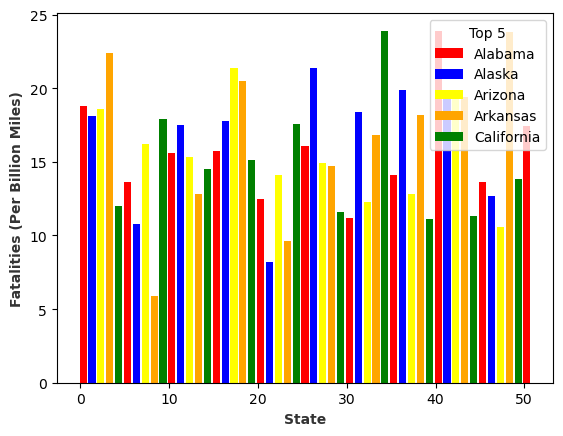

In [7]:
# Let's add some ways to visualize this data starting with total accidents:

columns = state
index = np.arange(len(columns)) + 0.3
total_sorted = total_accident.sort_values(ascending=False)
total_sorted.index = state

plt.bar(index, total_accident, label = state, color = ('red', 'blue', 'yellow', 'orange', 'green'))

plt.xlabel("State", fontweight = 'bold', color='#333333')
plt.ylabel('Fatalities (Per Billion Miles)', fontweight = 'bold', color = '#333333')
plt.legend(total_sorted.head(5).index, loc='upper right', title='Top 5')

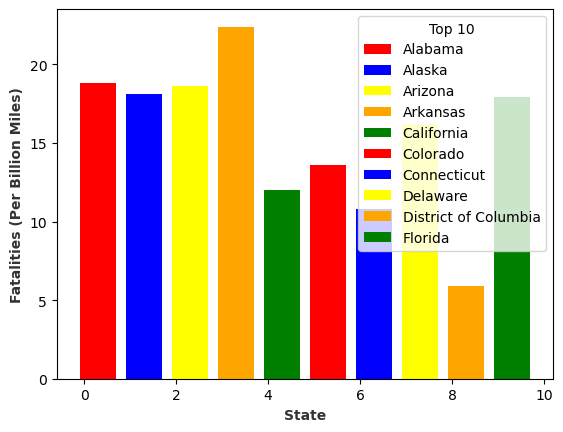

In [8]:
# Just the top 10 of total

columns = state.head(10)
index = np.arange(len(columns)) + 0.3
total_sorted = total_accident.sort_values(ascending=False)
total_sorted.index = state

plt.bar(index, total_accident.head(10), label = state.head(10), color = ('red', 'blue', 'yellow', 'orange', 'green'))

plt.xlabel("State", fontweight = 'bold', color='#333333')
plt.ylabel('Fatalities (Per Billion Miles)', fontweight = 'bold', color = '#333333')
plt.legend(total_sorted.head(10).index, loc='upper right', title='Top 10')

plt.show()

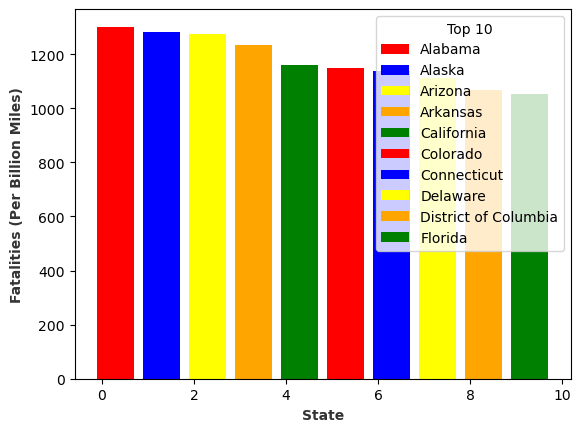

In [9]:
# Top 10 states with the highest premiums is very similar to the previous bar chart

columns = state.head(10)
index = np.arange(len(columns)) + 0.3
premiums_sorted = premiums.sort_values(ascending=False)
premiums_sorted.index = state

plt.bar(index, premiums_sorted.head(10), label = state.head(10), color = ('red', 'blue', 'yellow', 'orange', 'green'))

plt.xlabel("State", fontweight = 'bold', color='#333333')
plt.ylabel('Fatalities (Per Billion Miles)', fontweight = 'bold', color = '#333333')
plt.legend(premiums_sorted.head(10).index, loc='upper right', title='Top 10')

plt.show()

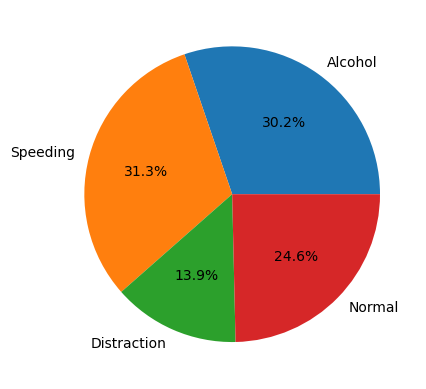

In [10]:
# Pie chart based on the ways in which crash fatalities happen

data = [alc_avg, speed_avg, distracted_accident.mean(), 25]
plt.pie(data, labels=['Alcohol', 'Speeding', 'Distraction', 'Normal'], autopct='%1.1f%%')

plt.show()